In [35]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize

from sklearn.preprocessing import MaxAbsScaler

In [3]:
path='train_data.txt'


df=pd.read_csv( path , sep=':::',engine='python',names=['ID', 'Title','Genre','Description'])
df.head()




,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
test_path='test_data.txt'

test_df=pd.read_csv( test_path , sep=':::',engine='python',names=['ID', 'Title','Description'])
test_df.head()

,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [5]:
labelcounts = df['Genre'].value_counts()

# Print the counts
print(labelcounts)

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64


In [6]:
df.describe()

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [8]:
#finding number of unique values in each column
print(df.nunique())

ID             54214
Title          54214
Genre             27
Description    54086
dtype: int64


Checking missing values:

In [9]:
missinginfo =df.isnull().sum()
print(missinginfo)

ID             0
Title          0
Genre          0
Description    0
dtype: int64


There are no missing values in the dataset

Data Visualization:

Text(0, 0.5, 'Genre')

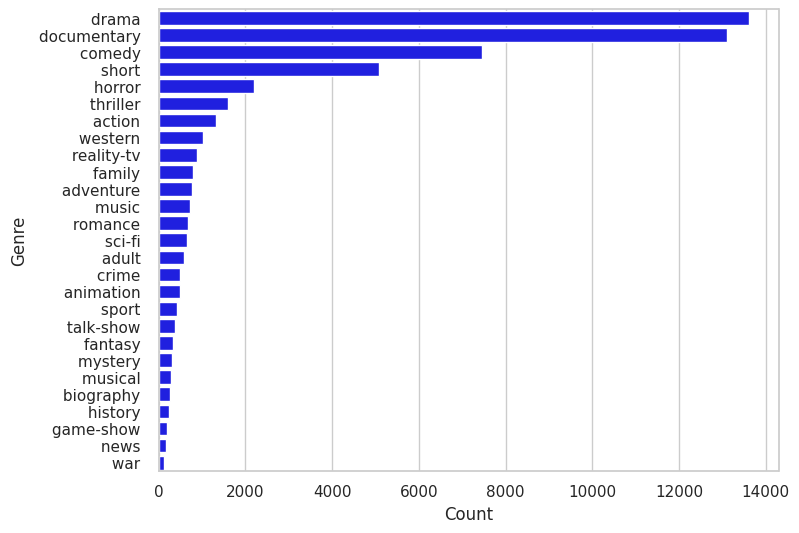

In [10]:

# Set up Seaborn style
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
counts = df.Genre.value_counts()
sns.barplot(x=counts, y=counts.index, color="blue", orient='h')
plt.xlabel('Count')
plt.ylabel('Genre')

Data Preprocessing:

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
df['length']=df['Description'].apply(len)
df.head()

,ID,Title,Genre,Description,length
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


In [14]:
import re
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):

    text = text.lower()                                  # lower-case all characters
    text = re.sub('-',' ',text.lower())   # remove hypens
    text = re.sub(f'[{string.digits}]',' ',text)  # remove digits
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])  # remove stopwords and stem other words
    text =  re.sub(r'@\S+', '',text)                     # remove twitter handles
    text =  re.sub(r'http\S+', '',text)                  # remove urls
    text =  re.sub(r'pic.\S+', '',text)
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)
          # only keeps characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # keep words with length>1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    stopwords = nltk.corpus.stopwords.words('english')   # remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip()            # remove repeated/leading/trailing spaces
    return re.sub(f'[{re.escape(string.punctuation)}]','',text) # remove punctuations

In [15]:
df['Filtered Tokens'] = df.Description.apply(preprocess_text)
test_df['Filtered Tokens'] = test_df.Description.apply(preprocess_text)

In [16]:
df.head()

,ID,Title,Genre,Description,length,Filtered Tokens
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,list convers doct parents year old osc learn n...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,broth sist past incestu rel cur murd relations...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty stud field trip muse nat history lit...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy fath mak end meet edi twin sist ...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,films titl ref recov body ground zero also sta...


In [17]:
test_df.head()

,ID,Title,Description,Filtered Tokens
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",bran lov lif car apartment job espec girlfrien...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belong w...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,year lif albin famy shepherd transylvania dire...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",fath died spok broth year sery cancer diego ta...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known intern mart art superstar bruc lee appea...


In [18]:
df['length_filtered']=df['Filtered Tokens'].apply(len)
df.head()

,ID,Title,Genre,Description,length,Filtered Tokens,length_filtered
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,list convers doct parents year old osc learn n...,324
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,broth sist past incestu rel cur murd relations...,83
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty stud field trip muse nat history lit...,325
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy fath mak end meet edi twin sist ...,616
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,films titl ref recov body ground zero also sta...,282


Loading Test Data Solution (to be used for measuring accuracy on test data)

In [19]:
sol_path='test_data_solution.txt'


test_sol_df=pd.read_csv( sol_path , sep=':::',engine='python',names=['ID', 'Title','Genre','Description'])
test_sol_df.head()

,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


## Removing Outliers

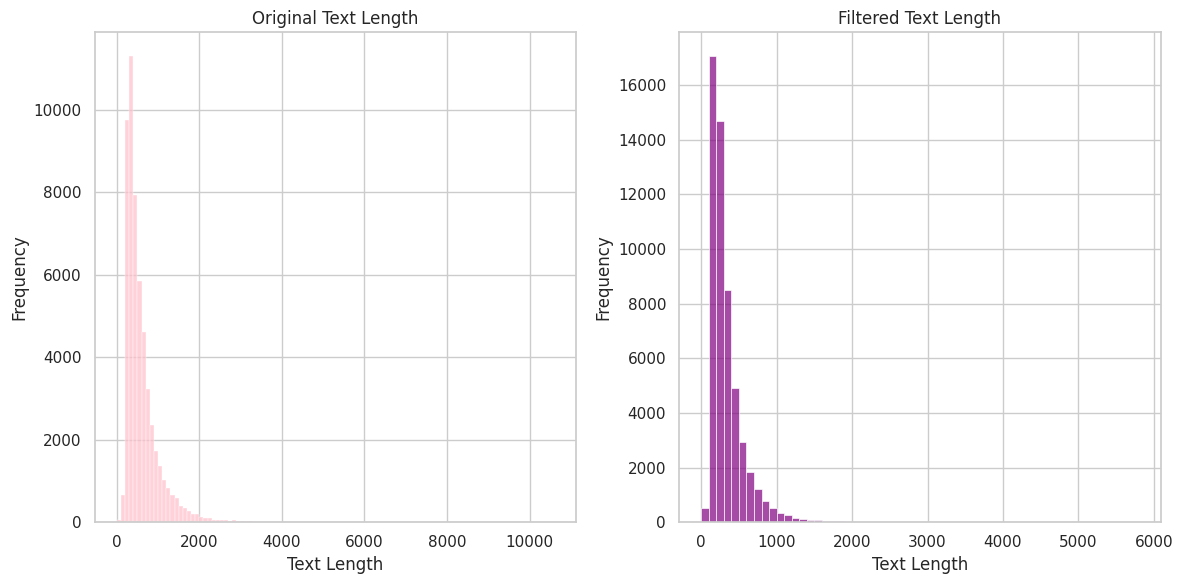

In [20]:



# Set up the figure and subplots
plt.figure(figsize=(12, 6))

# Original text length distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='length', bins=range(0, max(df['length']) + 100, 100), color='pink', alpha=0.7)
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Filtered text length distribution
plt.subplot(1, 2, 2)
sns.histplot(data=df , x='length_filtered', bins=range(0, max(df['length_filtered']) + 100, 100), color='purple', alpha=0.7)
plt.title('Filtered Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Removing entries with filtered token length > 1800

In [21]:
# Filter out entries with filtered token length > 1800
df = df[df['length_filtered'] <= 1800]

# Now the train_data DataFrame only contains entries with filtered text length <= 1800


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54084 entries, 0 to 54213
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               54084 non-null  int64 
 1   Title            54084 non-null  object
 2   Genre            54084 non-null  object
 3   Description      54084 non-null  object
 4   length           54084 non-null  int64 
 5   Filtered Tokens  54084 non-null  object
 6   length_filtered  54084 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 3.3+ MB


Tokenization:

In [23]:


train_cleaned_texts = df['Filtered Tokens'].str.lower()
test_cleaned_texts = test_df['Filtered Tokens'].str.lower()

# Tokenize text data using NLTK
X_train_tokens = [word_tokenize(text) for text in train_cleaned_texts]
X_test_tokens = [word_tokenize(text) for text in test_cleaned_texts]



In [24]:
# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, tokenizer=lambda x: x, preprocessor=lambda x: x)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_tokens)
X_test_tfidf = tfidf_vectorizer.transform(X_test_tokens)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [25]:
# Scale the TF-IDF features
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_tfidf)
X_test_scaled = scaler.transform(X_test_tfidf)

# Convert genre labels to numerical values
genre_mapping = {genre: idx for idx, genre in enumerate(df['Genre'].unique())}
y_train = df['Genre'].map(genre_mapping)
y_test = test_sol_df['Genre'].map(genre_mapping)

Support Vector Machine Model

In [26]:

# Train a Support Vector Machine model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

# Predict genres for the test data
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluate the Support Vector Machine model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)

print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", svm_report)

SVM Accuracy: 0.5526752767527675
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.70      0.61     13612
           1       0.28      0.21      0.24      1590
           2       0.53      0.44      0.48       590
           3       0.68      0.77      0.72     13096
           4       0.53      0.52      0.53      7446
           5       0.19      0.10      0.13       505
           6       0.39      0.29      0.33       883
           7       0.60      0.55      0.57      2204
           8       0.56      0.42      0.48       431
           9       0.27      0.15      0.19       498
          10       0.37      0.28      0.32      1314
          11       0.24      0.11      0.15       322
          12       0.41      0.30      0.35      5072
          13       0.46      0.34      0.39       646
          14       0.55      0.51      0.53       731
          15       0.41      0.23      0.29       775
          16       0

Naive Bayes

In [32]:
# Create and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_scaled, y_train)  # Use the integer labels

# Predict genres for the test data
nb_predictions = nb_model.predict(X_test_scaled)

# Evaluate the Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_report = classification_report(y_test, nb_predictions)

print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:\n", nb_report)


Naive Bayes Accuracy: 0.5530258302583025
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.74      0.61     13612
           1       0.31      0.13      0.18      1590
           2       0.54      0.25      0.34       590
           3       0.62      0.82      0.71     13096
           4       0.51      0.54      0.52      7446
           5       0.31      0.02      0.04       505
           6       0.45      0.20      0.28       883
           7       0.59      0.59      0.59      2204
           8       0.66      0.33      0.44       431
           9       0.39      0.02      0.04       498
          10       0.41      0.31      0.35      1314
          11       0.46      0.02      0.04       322
          12       0.44      0.22      0.30      5072
          13       0.50      0.26      0.34       646
          14       0.49      0.56      0.52       731
          15       0.47      0.14      0.21       775
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression

In [34]:


# Create and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=500)
logreg_model.fit(X_train_scaled, y_train)  # Use the integer labels

# Predict genres for the test data
logreg_predictions = logreg_model.predict(X_test_scaled)

# Evaluate the Logistic Regression model
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_report = classification_report(y_test, logreg_predictions)

print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Classification Report:\n", logreg_report)


Logistic Regression Accuracy: 0.5694649446494465
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.71      0.62     13612
           1       0.32      0.18      0.23      1590
           2       0.59      0.35      0.44       590
           3       0.68      0.81      0.74     13096
           4       0.53      0.57      0.55      7446
           5       0.25      0.07      0.10       505
           6       0.46      0.26      0.33       883
           7       0.61      0.57      0.59      2204
           8       0.63      0.37      0.47       431
           9       0.36      0.10      0.16       498
          10       0.40      0.31      0.35      1314
          11       0.37      0.08      0.14       322
          12       0.40      0.34      0.37      5072
          13       0.50      0.29      0.37       646
          14       0.60      0.49      0.54       731
          15       0.45      0.21      0.2

Accuracies:

SVM: 55.26%

Naive Bayes: 55.3%

Logistic Regression:56.9%
